In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


importing dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantvillage-dataset


In [4]:
import os

# Replace `path` with the actual variable if needed
print("Files in dataset:")
print(os.listdir(path))


Files in dataset:
['plantvillage dataset']


In [5]:
import os

print("Top-level contents:")
print(os.listdir(path))


Top-level contents:
['plantvillage dataset']


In [6]:
inner_path = os.path.join(path, 'plantvillage dataset')  # replace 'PlantVillage' with actual folder name
print("Subfolders (classes):", os.listdir(inner_path))


Subfolders (classes): ['segmented', 'grayscale', 'color']


In [7]:
color_path = os.path.join(path, 'plantvillage dataset', 'color')
print(os.listdir(color_path))
print(len(os.listdir(color_path)))

gray_path=os.path.join(path, 'plantvillage dataset', 'grayscale')
print(os.listdir(gray_path))
print(len(os.listdir(gray_path)))




['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [8]:
# 1. Count how many files are inside “Grape___healthy”
grape_folder = os.path.join(color_path, "Grape___healthy")
print(len(os.listdir(grape_folder)))

# 2. Show the first five filenames inside that same folder
print(os.listdir(grape_folder)[:5])


423
['71af6c2b-b3ed-4629-8aaa-7b60187caee1___Mt.N.V_HL 9069.JPG', '244804b5-05e2-4372-a376-36a0655aff41___Mt.N.V_HL 6121.JPG', '4b266fb8-a762-4073-a9e2-25a3861115c4___Mt.N.V_HL 6152.JPG', '4bd0c235-94b2-4d5d-a76e-58df595e7802___Mt.N.V_HL 6032.JPG', '12331981-d038-4eb0-a1c6-64b27f226cab___Mt.N.V_HL 6106.JPG']


In [9]:
Apple___Cedar_apple_rust_folder = os.path.join(color_path, "Apple___Cedar_apple_rust")
print(len(os.listdir(Apple___Cedar_apple_rust_folder)))

# 2. Show the first five filenames inside that same folder
print(os.listdir(Apple___Cedar_apple_rust_folder)[:5])

275
['d3df6ac8-4b20-460a-ad91-68e50d49078c___FREC_C.Rust 3879.JPG', '17b9f64c-4660-424f-9c8e-d9a49654e512___FREC_C.Rust 3776.JPG', 'adc62175-3fb6-4273-81d2-818c75ba0ab1___FREC_C.Rust 0233.JPG', '94d6b99f-2ac4-4a88-823f-3c607358d057___FREC_C.Rust 9826.JPG', '7b2dd7f1-d16e-47b6-8750-cfaf315aad87___FREC_C.Rust 0109.JPG']


processing the data

(256, 256, 3)


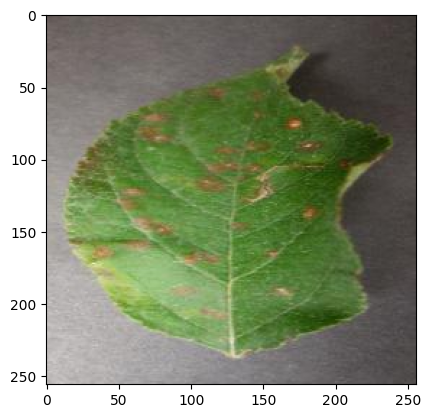

[[[104  94  92]
  [102  92  90]
  [101  91  89]
  ...
  [ 67  62  59]
  [ 64  59  56]
  [ 62  57  54]]

 [[ 98  88  86]
  [ 96  86  84]
  [ 95  85  83]
  ...
  [ 65  60  57]
  [ 64  59  56]
  [ 63  58  55]]

 [[101  91  89]
  [ 99  89  87]
  [ 97  87  85]
  ...
  [ 63  58  55]
  [ 63  58  55]
  [ 63  58  55]]

 ...

 [[182 178 177]
  [180 176 175]
  [183 179 178]
  ...
  [ 78  74  73]
  [ 82  78  77]
  [ 87  83  82]]

 [[187 183 182]
  [182 178 177]
  [181 177 176]
  ...
  [ 81  77  76]
  [ 82  78  77]
  [ 84  80  79]]

 [[194 190 189]
  [186 182 181]
  [182 178 177]
  ...
  [ 82  78  77]
  [ 78  74  73]
  [ 75  71  70]]]


In [10]:
base_dir = 'plantvillage dataset/color'
temp_img = os.path.join(
    color_path,                 # e.g. "/content/…/plantvillage dataset/color"
    'Apple___Cedar_apple_rust',
    'd3df6ac8-4b20-460a-ad91-68e50d49078c___FREC_C.Rust 3879.JPG'
)

img=mpimg.imread(temp_img)
print(img.shape)
plt.imshow(img)
plt.show()
print(img)


In [11]:
img[0][0]
img[0][2]

array([101,  91,  89], dtype=uint8)

we dont know what are the dimensions of each image but we want all the images to be of one dimension before training our model so we will define our image size initially and then pass all of them through a function and then convert them to a specific size

This line in both train_generator and validation_generator:

python
Copy code
target_size=(img_size, img_size),
is doing the work. Specifically:

python
Copy code
target_size=(224, 224)
forces all images to be resized to 224×224 pixels when they're loaded, regardless of their original size.



In [12]:

# Image Parameters
img_size = 224
batch_size = 32


Train Test Split

In [13]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [14]:
# Train Generator
base_dir = os.path.join(path, 'plantvillage dataset', 'color')

train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [15]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=2,               # Stop after 2 epochs with no improvement
    restore_best_weights=True  # Revert to best weights
)


In [17]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 355s 257ms/step - accuracy: 0.6044 - loss: 1.6229 - val_accuracy: 0.8704 - val_loss: 0.4099
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 136s 79ms/step - accuracy: 0.9218 - loss: 0.2476 - val_accuracy: 0.8737 - val_loss: 0.4189
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 107s 79ms/step - accuracy: 0.9665 - loss: 0.1034 - val_accuracy: 0.8692 - val_loss: 0.4931


In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score,
    recall_score, mean_squared_error,
    average_precision_score
)


In [22]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // batch_size
)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8667 - loss: 0.4199
Validation Accuracy: 87.03%


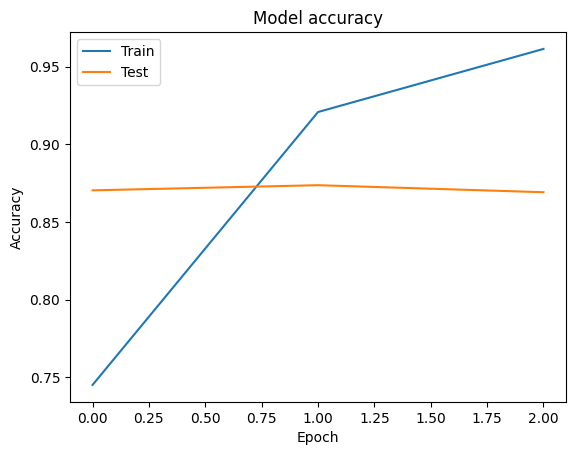

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [24]:
validation_generator.reset()
y_pred_probs = model.predict(validation_generator, steps=validation_generator.samples // batch_size)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = validation_generator.classes[:len(y_pred)]


339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step


In [28]:
# Reset generator to start
validation_generator.reset()

# Predict probabilities and classes
y_pred_probs = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = validation_generator.classes[:len(y_pred)]

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step
Accuracy: 0.04489306784660767
Precision: 0.026524811698062208
Recall: 0.02648776101460748
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.01      0.01       126
           1       0.00      0.00      0.00       124
           2       0.00      0.00      0.00        55
           3       0.03      0.04      0.04       329
           4       0.03      0.03      0.03       300
           5       0.02      0.02      0.02       210
           6       0.03      0.04      0.04       170
           7       0.02      0.02      0.02       102
           8       0.03      0.03      0.03       238
           9       0.03      0.03      0.03       197
          10       0.02      0.02      0.02       232
          11       0.03      0.02      0.02       236
          12       0.03      0.03      0.03       276
          13       0.00      0.00      0.00       215
          14       0.00      0.0

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Assuming y_test is one-hot and y_pred is probabilities
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


NameError: name 'y_test' is not defined

In [ ]:
class_labels = list(validation_generator.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))



Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.02      0.03       126
                                 Apple___Black_rot       0.01      0.01      0.01       124
                          Apple___Cedar_apple_rust       0.03      0.02      0.02        55
                                   Apple___healthy       0.03      0.03      0.03       329
                               Blueberry___healthy       0.02      0.02      0.02       300
          Cherry_(including_sour)___Powdery_mildew       0.01      0.01      0.01       210
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       102
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       238
               Corn_(maize)___Northern_Leaf_Blight    

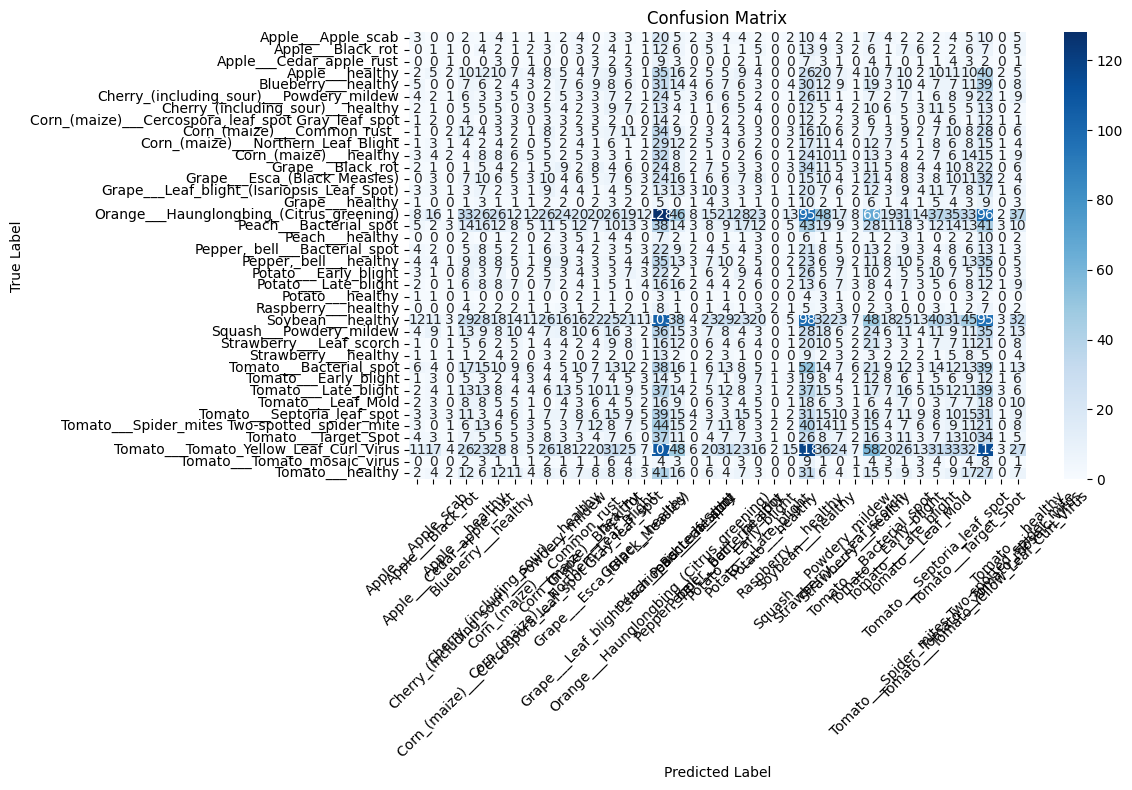

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def compute_mean_iou(conf_matrix):
    ious = []
    num_classes = conf_matrix.shape[0]

    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        denom = TP + FP + FN

        if denom == 0:
            ious.append(0)  # Avoid division by zero
        else:
            iou = TP / denom
            ious.append(iou)

    mean_iou = np.mean(ious)
    return mean_iou, ious

# Example usage
mean_iou, per_class_ious = compute_mean_iou(conf_matrix)
print(f"Mean IoU: {mean_iou:.4f}")
print("Per-class IoUs:", per_class_ious)


Mean IoU: 0.0148
Per-class IoUs: [np.float64(0.013043478260869565), np.float64(0.00423728813559322), np.float64(0.011235955056179775), np.float64(0.01607717041800643), np.float64(0.01048951048951049), np.float64(0.0066815144766146995), np.float64(0.0), np.float64(0.0), np.float64(0.016842105263157894), np.float64(0.00510204081632653), np.float64(0.011933174224343675), np.float64(0.0182648401826484), np.float64(0.012411347517730497), np.float64(0.011286681715575621), np.float64(0.0), np.float64(0.06049149338374291), np.float64(0.015748031496062992), np.float64(0.007194244604316547), np.float64(0.009852216748768473), np.float64(0.019011406844106463), np.float64(0.020454545454545454), np.float64(0.015915119363395226), np.float64(0.0), np.float64(0.006711409395973154), np.float64(0.04989816700610998), np.float64(0.02368421052631579), np.float64(0.011037527593818985), np.float64(0.011627906976744186), np.float64(0.021604938271604937), np.float64(0.020356234096692113), np.float64(0.023222060

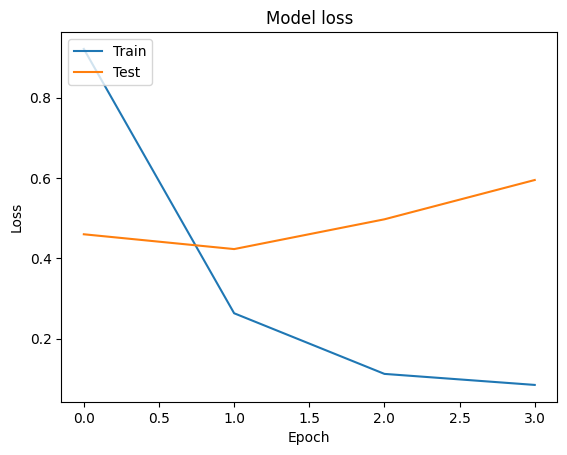

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

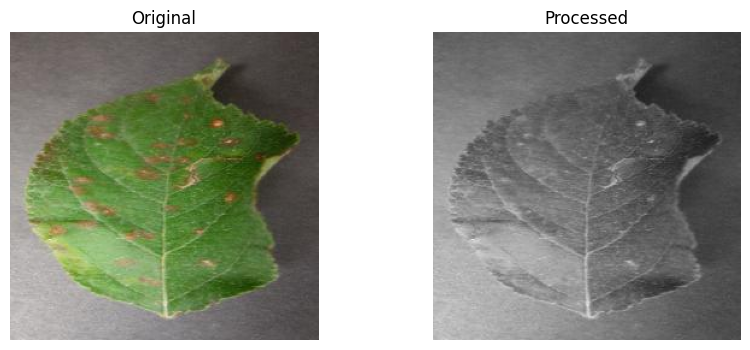

SSIM: 0.9236
PSNR: 19.75 dB


In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

# Step 1: Load original image
original = cv2.imread(temp_img)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Step 2: Create a processed version (grayscale to RGB)
gray = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
processed = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Step 3: Show both images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(processed)
plt.title("Processed")
plt.axis("off")
plt.show()


ssim_val = ssim(original, processed, channel_axis=-1)
psnr_val = psnr(original, processed, data_range=processed.max() - processed.min())

print(f"SSIM: {ssim_val:.4f}")
print(f"PSNR: {psnr_val:.2f} dB")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Example path in your Google Drive
model_path = '/content/drive/MyDrive/plant_disease_prediction_model.h5'
model.save(model_path)
